# 第5回のコード

Juliaの実装を紹介する。

なおこのコードの実行の前に以下のパッケージをインストールする必要がある。

```
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("ForwardDiff") # or Pkg.add("Zygote")
```

### 例１．多項式の根の求解

関数 $x^2-2=0$ の解 $\tilde{x}=\pm \sqrt{2}$ を求めることを考える。

In [1]:
# Problem f(x) = 0
f(x)  = x^2-2
Df(x) = 2x

# Newton iteration
num_itr = 0
tol = 1e-12
x_0 = 1.0
x = x_0
Fx = f(x)
# DF = Df(x)
println("Before iteration: $(abs(Fx))")

while num_itr ≤ 10
    dx = Fx/Df(x)
    x = x - dx
    num_itr += 1
    Fx = f(x)
    println("After $(num_itr) iteration: $(abs(Fx))")
    if abs(Fx) < tol
        break
    end
end

@show x
@show sqrt(2.);

Before iteration: 1.0
After 1 iteration: 0.25
After 2 iteration: 0.006944444444444642
After 3 iteration: 6.007304882871267e-6
After 4 iteration: 4.510614104447086e-12
After 5 iteration: 4.440892098500626e-16
x = 1.4142135623730951
sqrt(2.0) = 1.4142135623730951


In [4]:
# A posteriori validation
@show　Y0 = abs(f(x))/2/abs(x)
@show Z0 = abs(1 - (1/x)*x)
Z1 = 0
@show　Z2 = 1/abs(x)

# p(r) = Z2*r^2 - (1-Z1-Z0)*r + Y0
a =Z2
b = -(1-Z1-Z0)
c = Y0

if b^2-4*a*c < 0
    println("error: connot find the root of radii polynomial")
else
    r_min = (-b - sqrt(b^2-4*a*c))/2/a
    r_max = (-b + sqrt(b^2-4*a*c))/2/a
    r₀ = r_min
    println("The solution is included in the interval")
    println("[$(x-r_min), $(x+r_min)]")
end

Y0 = (abs(f(x)) / 2) / abs(x) = 1.570092458683775e-16
Z0 = abs(1 - (1 / x) * x) = 0.0
Z2 = 1 / abs(x) = 0.7071067811865475
The solution is included in the interval
[1.414213562373095, 1.4142135623730954]


### 例２．Logistic map の 3 周期解

変数 $x$ に対して

$$
x \mapsto \lambda x(1-x), \quad \lambda \in \mathbb{R}
$$

という写像をロジスティック写像という。 この写像が $x_{1} \rightarrow x_{2} \rightarrow x_{3} \rightarrow x_{1}$ という値で変化する3周期解を計算する

#### 問題1

与えられた $\lambda \in \mathbb{R}$ に対して, 

$$
\left\{\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right)=0 \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right)=0 \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)=0
\end{array}\right.
$$

をみたす $x=(x_1,x_2,x_3)^T\in \mathbb{R}$ を求めよ。写像 $F:\mathbb{R}^3 \rightarrow \mathbb{R}^3$は以下のようにおくことができる

$$
F(x):=\left[\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right) \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right) \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)
\end{array}\right].
$$

ある $x\in \mathbb{R}^3$におけるJacobi行列は以下ようにおくことができる

$$
DF(x):=\left[\begin{array}{ccc}
1 & 0 & -\lambda\left(1-2 x_{3}\right) \\
-\lambda\left(1-2 x_{1}\right) & 1 & 0 \\
0 & -\lambda\left(1-2 x_{2}\right) & 1
\end{array}\right].
$$

In [9]:
using LinearAlgebra
# Problem F(x) = 0
lam = 3.82843
#lam = 4
tol = 1e-12
p = Inf

F((x, y, z)) = [x - lam*z*(1-z)
    y - lam*x*(1-x)
    z - lam*y*(1-y)]

DF((x, y, z)) = [1 0 -lam*(1-2*z);
    -lam*(1-2*x) 1 0;
    0 -lam*(1-2*y) 1]

# Newton iteration
X0 = [1; -1; 1]
X = X0

num_itr = 0
FX = F(X)
println("Before iteration: $(norm(FX,p))")

while num_itr ≤ 100
    dx = DF(X)\FX
    X = X - dx
    num_itr += 1
    FX = F(X)
    println("After $(num_itr) iteration: $(norm(FX,p))")
    if norm(FX,p) < tol
        break
    end
end
X̄ = X

println(X̄)

Before iteration: 8.65686
After 1 iteration: 2.03673166837743
After 2 iteration: 0.39932711426463197
After 3 iteration: 0.04038340591257372
After 4 iteration: 0.0007521985462234371
After 5 iteration: 0.00017604037191443211
After 6 iteration: 4.392700242539238e-5
After 7 iteration: 1.082028315235739e-5
After 8 iteration: 2.5508341786606437e-6
After 9 iteration: 5.075334114090779e-7
After 10 iteration: 5.542976666550459e-8
After 11 iteration: 1.0823354434918997e-9
After 12 iteration: 4.46975789714088e-13
[0.9562724718522855, 0.16008745214881528, 0.5147686297331594]


In [10]:
# A posteriori validation
A = inv(DF(X̄))
@show Y0 = norm(A*F(X̄),p)
@show Z0 = opnorm(Matrix{Float64}(I,size(A)) - A*DF(X̄),p)
Z1 = 0
@show Z2 = 2*lam*opnorm(A,p)

# p(r) = Z2*rˆ2 - (1-Z1-Z0)*r + Y0
a = Z2
b = -(1-Z1-Z0)
c = Y0

if b^2-4*a*c < 0
    println("error: cannot find root of radii polynomial")
else
    r_min = (-b - sqrt(b^2-4*a*c))/2/a
    r_max = (-b + sqrt(b^2-4*a*c))/2/a
    r₀ = r_min
    println("The solution is included in the interval vector")
    @show X̄
    println("with the radius $(r₀).")
end

Y0 = norm(A * F(X̄), p) = 1.412022583894426e-10
Z0 = opnorm(Matrix{Float64}(I, size(A)) - A * DF(X̄), p) = 2.1316282072803006e-14
Z2 = 2 * lam * opnorm(A, p) = 3445.2538173894955
The solution is included in the interval vector
X̄ = [0.9562724718522855, 0.16008745214881528, 0.5147686297331594]
with the radius 1.4120232707729627e-10.


#### 問題2

次をみたす $x = (\lambda,x_1,x_2,x_3) \in \mathbb{R}^4$ を求めよ

$$
\left\{\begin{array}{l}
x_{1}-\lambda x_{3}\left(1-x_{3}\right)=0 \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right)=0 \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)=0
\end{array}\right.
$$

ただし, 問題2は未知数4つに対して, 方程式が3つしかないため正確な解を導くのが困難である。このため位相条件と呼ばれる式を追加する。

$$
\eta(x):=x_{1}+x_{2}+x_{3}-\eta_{0}, \quad \eta_{0} \in \mathbb{R}
$$

これにより写像$F:\mathbb{R}^4 \rightarrow \mathbb{R}^4$を

$$
F(x):=\left[\begin{array}{l}
x_{1}+x_{2}+x_{3}-\eta_{0} \\
x_{1}-\lambda x_{3}\left(1-x_{3}\right) \\
x_{2}-\lambda x_{1}\left(1-x_{1}\right) \\
x_{3}-\lambda x_{2}\left(1-x_{2}\right)
\end{array}\right]
$$

と定義する。ある$x \in \mathbb{R}^4$おけるJacobi行列は以下のように表すことができる。

$$
D F(x)=\left[\begin{array}{cccc}
0 & 1 & 1 & 1 \\
-x_{3}\left(1-x_{3}\right) & 1 & 0 & -\lambda\left(1-2 x_{3}\right) \\
-x_{1}\left(1-x_{1}\right) & -\lambda\left(1-2 x_{1}\right) & 1 & 0 \\
-x_{2}\left(1-x_{2}\right) & 0 & -\lambda\left(1-2 x_{2}\right) & 1
\end{array}\right].
$$

いま  $\eta= 1.6311$ として, 初期値を $x_0 = (3, 1, −1, 1)^T$ とすると近似解 $\bar{x}$ が得られる。

In [11]:
# Problem F(x) = 0
eta = 1.6311
tol = 1e-12
p = Inf

F((lam, x, y, z)) = [x + y + z - eta
    x - lam*z*(1-z)
    y - lam*x*(1-x)
    z - lam*y*(1-y)]

DF((lam, x, y, z)) = [0 1 1 1;
    -z*(1-z ) 1 0 -lam*(1-2*z);
    -x*(1-x) -lam*(1-2*x) 1 0;
    -y*(1-y) 0 -lam*(1-2*y) 1]

# Newton iteration
X0 = [3.0;1.0;-1.0;1.0]
X = X0

num_itr = 0
FX = F(X)

println("Before iteration: $(norm(FX,p))")

while num_itr ≤ 500
    dx = DF(X)\FX
    X = X - dx
    num_itr += 1
    FX = F(X)
    println("After $(num_itr) iteration: $(norm(FX,p))")
    if norm(FX,p) < tol
        break
    end
end

X̄ = X

println(X̄)

Before iteration: 7.0
After 1 iteration: 0.8511155751995336
After 2 iteration: 0.15669460068680974
After 3 iteration: 0.0019454003044703239
After 4 iteration: 8.397146644245623e-6
After 5 iteration: 6.360290072393582e-11
After 6 iteration: 1.3877787807814457e-16
[3.828429696603496, 0.9562749287915785, 0.1600788558411345, 0.5147462153672872]


In [12]:
using ForwardDiff
# using Zygote
# Newton solver
function newton(F,x0)
    tol = 1e-12; count = 0;
    x = x0;
    Fx = F(x);
    while maximum(abs.(Fx))/minimum(abs.(x)) ≥ tol && count ≤ 20
        DF = ForwardDiff.derivative(F,x);
        # DF = gradient(F,x)[1];
        x -= DF\Fx;
        Fx = F(x);
        count += 1;
    end
    return x
end

newton (generic function with 1 method)

In [13]:
# A posteriori validation
A = inv(DF(X̄))
@show Y0 = norm(A*F(X̄),p)
@show Z0 = opnorm(Matrix{Float64}(I,size(A)) - A*DF(X̄),p)
Z1 = 0

# Z₂ bounds
λ, x, y, z = X

B(r) = [0 0 0 0;
    (1+(2*z+r)) 0 0 (1+(z+r))+(λ+r);
    (1+(2*x+r)) (1+(x+r))+(λ+r) 0 0;
    (1+(2*y+r)) 0 (1+(y+r))+(λ+r) 0]

Z₂(r) = norm(A*B(r),p)

p_func(r) = Z₂(r)*r^2 - (1-Z1-Z0)*r + Y0

r0 = newton(p_func,1e-10)
# 2.6510669062725726e-16

Y0 = norm(A * F(X̄), p) = 2.6510669062725495e-16
Z0 = opnorm(Matrix{Float64}(I, size(A)) - A * DF(X̄), p) = 2.2906143742332863e-15


2.6510669062725726e-16

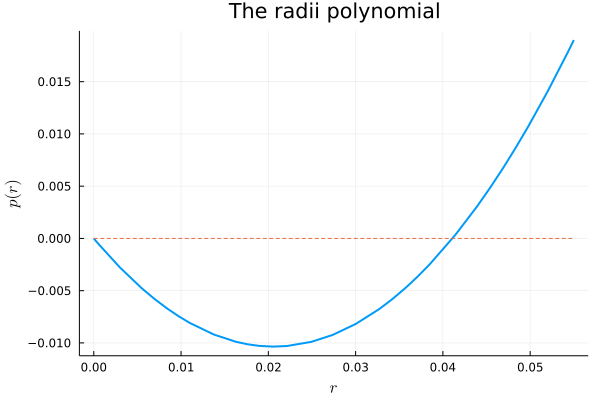

In [14]:
using Plots
plot(p_func,0,0.055,
    line       = 2,
    size       = (600,400),
    legend     = false,
    title="The radii polynomial",
    xlabel     = "\$r\$",
    ylabel     = "\$p\\,(r)\$", 
)
fzero(x) = 0
plot!(fzero,0,0.055,linestyle=:dash)